In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv("./Data/test.csv")

data = pd.concat((train_df.loc[:,:], test_df.loc[:, :]))
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [119]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


__categorical variables__: <br />
  [ 'MSSubClass' , 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
  
  __ordinal variables__: <br />
  [ 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces' , 'FireplaceQu',  'BsmtQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
  
  __continous variables__ are: <br />
  [ 'LotFrontage', 'LotArea', 'MasVnrArea'', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',  '2ndFlrSF',  'LowQualFinSF',  'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' ]
  
  __other variables__ (Date, etc..) : <br />
  [' YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

### Exploratory Data Analysis

<Axes: xlabel='SalePrice', ylabel='Count'>

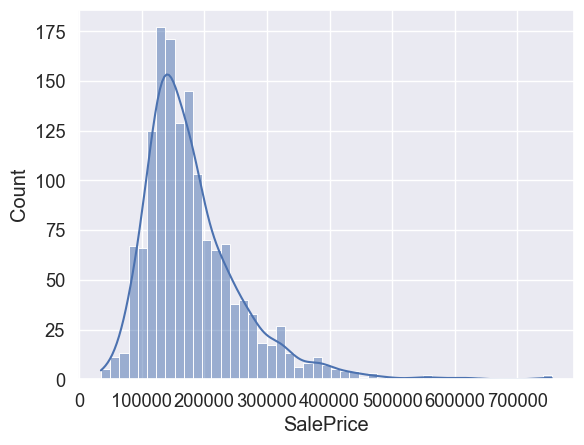

In [120]:
# The Density Plot of SalePrice
sns.histplot(train_df['SalePrice'], kde = True)

<Axes: ylabel='SalePrice'>

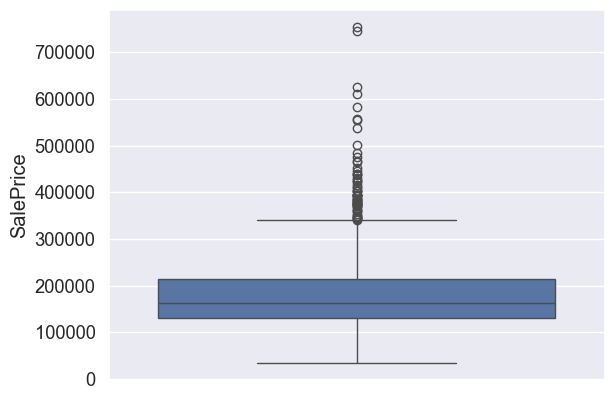

In [121]:
sns.boxplot(train_df['SalePrice'])

#### It seems that our dependent variable has a skewed distribution and not an approximately normal distribution. 
#### We do Logarithm transformation.

In [122]:
train_df["SalePrice"] = np.log(train_df["SalePrice"])

Text(0.5, 1.0, 'Density plot of SalePrice after Log Transformation')

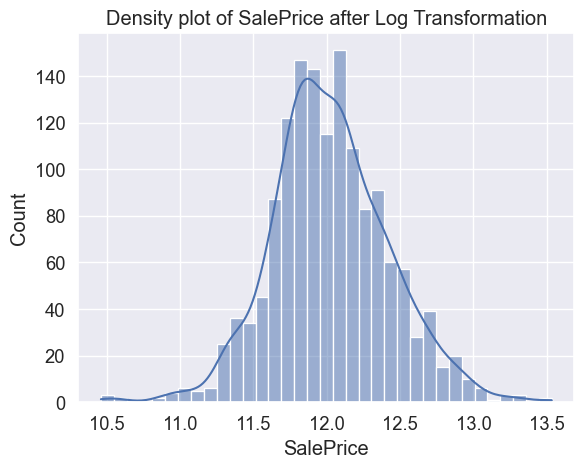

In [123]:
# SalePrice after Log-transformation
sns.histplot(train_df["SalePrice"], kde=True)
plt.title("Density plot of SalePrice after Log Transformation")

In [124]:
y_train = train_df["SalePrice"]

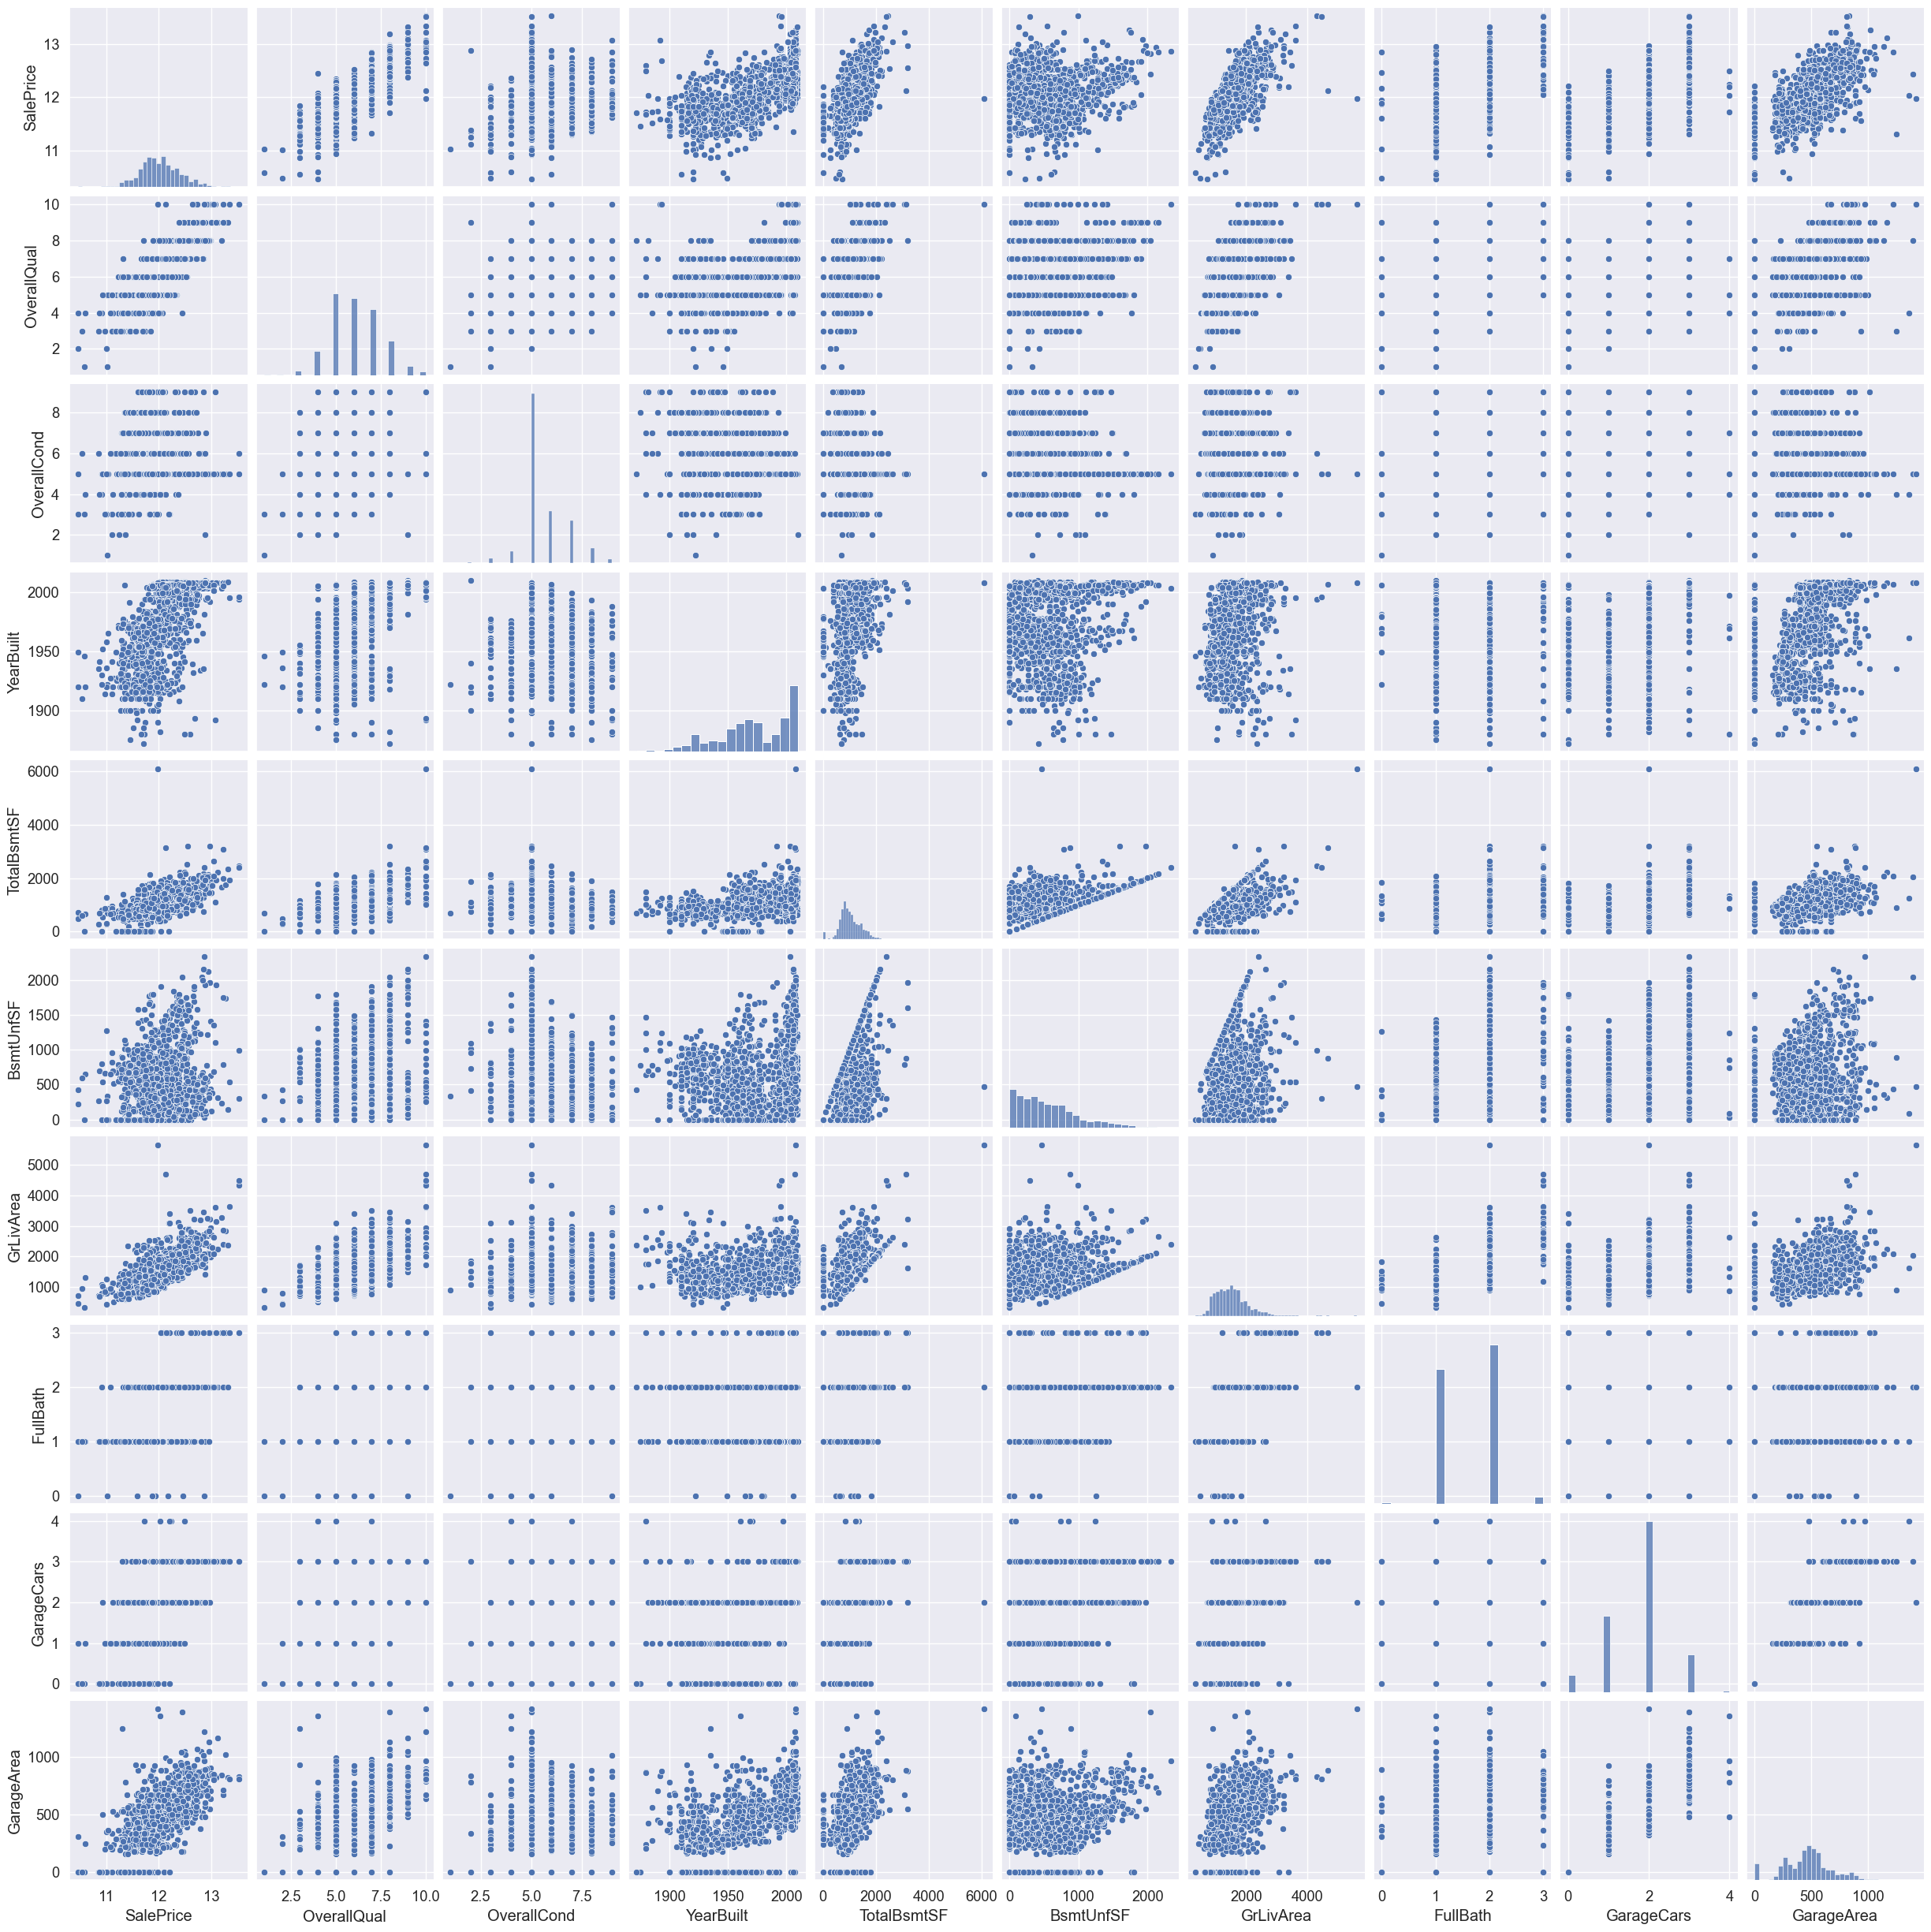

In [125]:

sns.pairplot(train_df[["SalePrice","OverallQual","OverallCond","YearBuilt","TotalBsmtSF","BsmtUnfSF","GrLivArea","FullBath","GarageCars","GarageArea"]])

#### Columns with Nan values

In [127]:
col_nan = train_df.isna().sum() / train_df.shape[0]

/var/folders/68/5xyl2gqs0ds9y8jc5y5650s00000gn/T/ipykernel_8214/360642628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=missing_values.index, x=missing_values.values, palette="Blues_r")


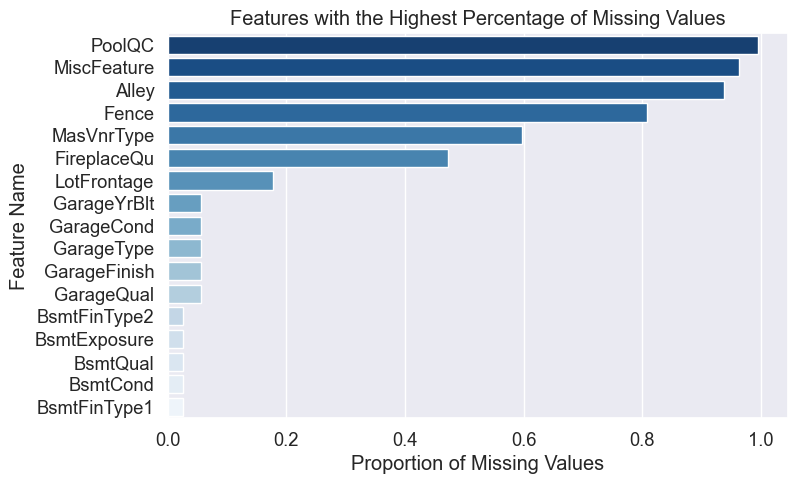

In [128]:
missing_values = train_df.isnull().mean().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0.01]  # 只顯示缺失率超過 1% 的欄位

plt.figure(figsize=(8, 5))
sns.barplot(y=missing_values.index, x=missing_values.values, palette="Blues_r")
plt.xlabel("Proportion of Missing Values")
plt.ylabel("Feature Name")
plt.title("Features with the Highest Percentage of Missing Values")
plt.show()

In [129]:
# Dropping columns for both train and test dataset
train_df = train_df.drop("Id", axis=1)
test_df = test_df.drop("Id", axis=1)

In [130]:
cols_to_drop = ["Street", "Utilities"]
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

In [131]:
from scipy import stats
def remove_outliers(dataset, threshold=3, columns=None, method="zscore", removed=False):

    if columns is None:
        numerics = ['int64', 'float64']
        columns = dataset.select_dtypes(include=numerics).columns
    
    tmp = dataset.copy()

    if method == "zscore":
        z = np.abs(stats.zscore(tmp[columns], nan_policy='omit'))  # Handle NaNs safely
        outliers = (z > threshold).any(axis=1)
    
    elif method == "iqr":
        Q1 = tmp[columns].quantile(0.25)
        Q3 = tmp[columns].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((tmp[columns] < (Q1 - 1.5 * IQR)) | (tmp[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    
    else:
        raise ValueError("Method must be 'zscore' or 'iqr'")
    
    outliers_idxs = tmp.index[outliers]
    print(f"Number of removed rows = {len(outliers_idxs)}")
    
    if removed:
        return dataset.drop(outliers_idxs), tmp.loc[outliers]
    return dataset.drop(outliers_idxs)


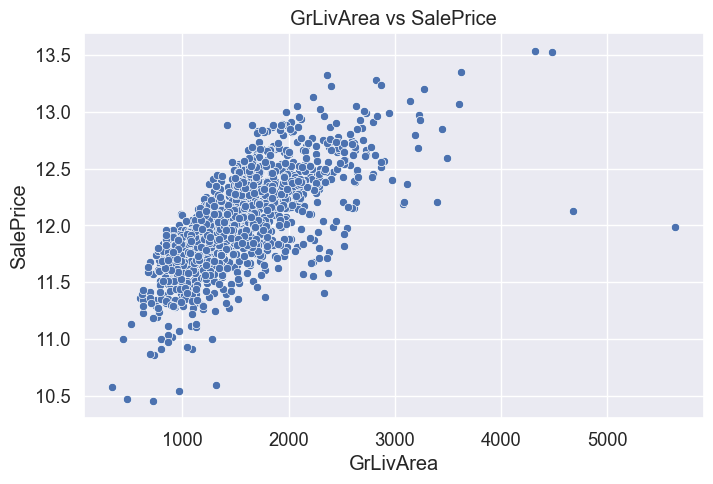

In [132]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
sns.scatterplot(x=train_df["GrLivArea"], y=train_df["SalePrice"])  # Use x= and y=
plt.title("GrLivArea vs SalePrice")
plt.show()

In [133]:
clear_data = train_df.drop(train_df[(train_df['GrLivArea']>4500)].index)

In [134]:
train_ = clear_data.drop(['SalePrice'], axis=1)
all_data = pd.concat([train_df, test_df]).reset_index(drop=True)

In [135]:
neigh_lot_frontage = all_data.groupby('Neighborhood')['LotFrontage'].agg(["mean", "median"])
neigh_lot_frontage['avg_mean_median'] = (neigh_lot_frontage['mean'] + neigh_lot_frontage['median'] )/ 2
neigh_lot_frontage

,mean,median,avg_mean_median
Neighborhood,,,
Blmngtn,46.900000,43.0,44.950000
Blueste,27.300000,24.0,25.650000
BrDale,21.500000,21.0,21.250000
BrkSide,55.789474,51.0,53.394737
ClearCr,88.150000,80.5,84.325000
CollgCr,71.336364,70.0,70.668182
Crawfor,69.951807,70.0,69.975904
Edwards,66.910112,65.0,65.955056
Gilbert,74.207207,64.0,69.103604


In [136]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [137]:
def convert_to_string(df, columns):
    df[columns] = df[columns].astype(str)
    return df

num_to_categ_features = ['MSSubClass', 'OverallCond']#, 'YrSold', 'MoSold']

all_data = convert_to_string(all_data, columns = num_to_categ_features)

In [138]:
num_features = all_data.select_dtypes(include=['int64','float64']).columns
num_features_to_constant = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"] 
num_features_to_median = [feature for feature in num_features if feature not in num_features_to_constant + ["SalePrice"]]


In [139]:
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper

# Define numerical features for imputation
num_features_to_median = ["LotFrontage", "MasVnrArea"]  # Replace with actual column names
num_features_to_constant = ["GarageYrBlt"]  # Replace with actual column names

# Ensure each column is treated as 2D (by wrapping in a list)
numeric_features_median = [([col], SimpleImputer(strategy='median')) for col in num_features_to_median]
numeric_features_zero = [([col], SimpleImputer(strategy='constant', fill_value=0)) for col in num_features_to_constant]

# Define DataFrameMapper
missing_val_imputer = DataFrameMapper(numeric_features_median + numeric_features_zero, df_out=True)

# Fit the imputer
imputed_median = missing_val_imputer.fit(all_data)

# Transform data
imputed_df = imputed_median.transform(all_data)

# Ensure column names remain consistent
imputed_df.columns = num_features_to_median + num_features_to_constant

# Display result
imputed_df.head()


,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [140]:
cat_feats = all_data.select_dtypes(include=['object']).columns

In [141]:
none_conversion = [("MasVnrType","None"),
                  ("BsmtQual","NA"), 
                  ("Electrical", "SBrkr"),
                  ("BsmtCond","TA"),
                  ("BsmtExposure","No"),
                  ("BsmtFinType1","No"),
                  ("BsmtFinType2","No"),
                  ("CentralAir","N"),
                  ("Condition1","Norm"), 
                  ("Condition2","Norm"),
                  ("ExterCond","TA"),
                  ("ExterQual","TA"), 
                  ("FireplaceQu","NA"),
                  ("Functional","Typ"),
                  ("GarageType","No"), 
                  ("GarageFinish","No"), 
                  ("GarageQual","NA"), 
                  ("GarageCond","NA"), 
                  ("HeatingQC","TA"), 
                  ("KitchenQual","TA"), 
                  ("Functional","Typ"), 
                  ("GarageType","No"), 
                  ("GarageFinish","No"), 
                  ("GarageQual","No"), 
                  ("GarageCond","No"), 
                  ("HeatingQC","TA"), 
                  ("KitchenQual","TA"),
                  ("MSZoning", "None"),
                  ("Exterior1st", "VinylSd"), 
                  ("Exterior2nd", "VinylSd"), 
                  ("SaleType", "WD")]

In [142]:
def none_transform(df, conversion_list):
    
    for col, new_str in conversion_list:
        df.loc[:, col] = df.loc[:, col].fillna(new_str)
    return df
# Applying the "none_transform" function 
all_data = none_transform(all_data, none_conversion)
len(all_data.columns)

78

In [143]:
# collecting the numeric features without considering SalePrice
numeric_features = [feat for feat in num_features if feat not in ['SalePrice']] 

# selecting columns with skew more than 0.5
skewed_features = all_data[num_features].apply(lambda x: x.dropna().skew())
skewed_features = skewed_features[skewed_features > 0.5].index
print("\nHighly skewed features: \n\n{}".format(skewed_features.tolist()))


Highly skewed features: 

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [144]:
from scipy.special import boxcox1p
lambda_ = 0.15
for feature in skewed_features:
    all_data[feature] = boxcox1p(all_data[feature], lambda_)

In [145]:
class OrderedLabelTransformer(BaseEstimator, TransformerMixin):
    orderDict = {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
    
    @staticmethod
    def get_dict(X):
        FirstDict = {"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}
        SecondDict = {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
        ThirdDict = {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}
        for d in [FirstDict, SecondDict, ThirdDict]:
            if set(X) == set(d): 
                return d
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def get_label(t):
            return self.orderDict[t]
        return np.array([get_label(n) for n in X])

In [146]:
from sklearn.base import BaseEstimator, TransformerMixin
class NeighborhoodTransformer(BaseEstimator, TransformerMixin):
    neighborhoodsmap = {'StoneBr' : 2, 'NridgHt' : 2, 'NoRidge': 2, 
                        'MeadowV' : 0, 'IDOTRR' : 0, 'BrDale' : 0 ,
                        'CollgCr': 1, 'Veenker' : 1, 'Crawfor' : 1,
                        'Mitchel' : 1, 'Somerst' : 1, 'NWAmes' : 1,
                        'OldTown' : 1, 'BrkSide' : 1, 'Sawyer' : 1, 
                        'NAmes' : 1, 'SawyerW' : 1, 'Edwards' : 1,
                        'Timber' : 1, 'Gilbert' : 1, 'ClearCr' : 1,
                        'NPkVill' : 1, 'Blmngtn' : 1, 'SWISU' : 1,
                        'Blueste': 1}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def get_label(t):
            return self.neighborhoodsmap[t]
        return np.array([get_label(n) for [n] in X])

In [147]:
class NeighborhoodTransformer(BaseEstimator, TransformerMixin):
    neighborhoodsmap = {'StoneBr' : 2, 'NridgHt' : 2, 'NoRidge': 2, 
                        'MeadowV' : 0, 'IDOTRR' : 0, 'BrDale' : 0 ,
                        'CollgCr': 1, 'Veenker' : 1, 'Crawfor' : 1,
                        'Mitchel' : 1, 'Somerst' : 1, 'NWAmes' : 1,
                        'OldTown' : 1, 'BrkSide' : 1, 'Sawyer' : 1, 
                        'NAmes' : 1, 'SawyerW' : 1, 'Edwards' : 1,
                        'Timber' : 1, 'Gilbert' : 1, 'ClearCr' : 1,
                        'NPkVill' : 1, 'Blmngtn' : 1, 'SWISU' : 1,
                        'Blueste': 1}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def get_label(t):
            return self.neighborhoodsmap[t]
        return np.array([get_label(n) for [n] in X])

In [148]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn_pandas import DataFrameMapper

# Define categorical features
order_feats = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual", "BsmtQual", 
               "BsmtCond", "FireplaceQu", "GarageQual", "GarageCond"]

# Encoding for ordered categorical features using OrdinalEncoder
order_features = [([col], OrdinalEncoder()) for col in order_feats]

# Encoding for "Neighborhood" (using LabelEncoder or a transformer)
neighb_features = [(["Neighborhood"], OrdinalEncoder())]  # Adjust if you have a custom transformer

# Create DataFrameMapper pipeline
label_encoder = DataFrameMapper(neighb_features + order_features, df_out=True)

# Transform the dataset
transformed_feats = label_encoder.fit_transform(all_data)

# Ensure column names remain correct
transformed_feats.columns = ["Neighborhood"] + order_feats

# Display result
transformed_feats.head()


,Neighborhood,ExterQual,ExterCond,HeatingQC,KitchenQual,BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond
0,5.0,2.0,4.0,0.0,2.0,2.0,3.0,3.0,5.0,5.0
1,24.0,3.0,4.0,0.0,3.0,2.0,3.0,5.0,5.0,5.0
2,5.0,2.0,4.0,0.0,2.0,2.0,3.0,5.0,5.0,5.0
3,6.0,3.0,4.0,2.0,2.0,4.0,1.0,2.0,5.0,5.0
4,15.0,2.0,4.0,0.0,2.0,2.0,3.0,5.0,5.0,5.0


In [149]:
transformed_feats.shape

(2919, 10)

In [150]:
# feature without any transformation till now
rest_features = set(pd.concat([imputed_df, transformed_feats],axis=1).columns).symmetric_difference(set(all_data.columns))
rest_features_df = all_data[list(rest_features)]
all_data = pd.concat([imputed_df, transformed_feats, rest_features_df],axis=1)
all_data.shape

(2919, 78)

In [154]:
# Total Squere Feet for house
all_data["TotalSqrtFeet"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]
# test_df["TotalSqrtFeet"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]

# Total number of bathrooms
all_data["TotalBaths"] = all_data["BsmtFullBath"] + (all_data["BsmtHalfBath"]  * .5) + all_data["FullBath"] + (all_data["HalfBath"]* .5)
# test_df["TotalBaths"] = test_df["BsmtFullBath"] + (test_df["BsmtHalfBath"]  * .5) + test_df["FullBath"] + (test_df["HalfBath"]* .5)


In [152]:
# If the house has a garage
all_data['Isgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a fireplace
all_data['Isfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a pool
all_data['Ispool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has second floor
all_data['Issecondfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Open Porch
all_data['IsOpenPorch'] = all_data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Wood Deck
all_data['IsWoodDeck'] = all_data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

In [155]:
all_data = all_data.drop(["SalePrice"], axis = 1)

hot_one_features = pd.get_dummies(all_data).reset_index(drop=True)
hot_one_features.shape

KeyError: "['SalePrice'] not found in axis"

In [156]:
all_data = pd.concat([transformed_feats, hot_one_features],axis=1)

In [157]:
train_preprocessed = all_data.iloc[:len(train_df),:]
test_preprocessed = all_data.iloc[len(train_preprocessed):,:]
print(len(test_preprocessed) == len(test_df))

True


In [158]:
X_train = train_preprocessed

In [161]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.linear_model import ElasticNet, Lasso, ElasticNetCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import RegressorMixin
import lightgbm as lgb

In [162]:
def rmse(model):
    n_folds=5
    kfold = KFold(n_folds, random_state=42, shuffle=True).get_n_splits(X_train)
    rmse_score = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = kfold, verbose = -1, n_jobs=-1))
    return(np.mean(rmse_score))

In [169]:
from sklearn.linear_model import LinearRegression
lr_model = make_pipeline(RobustScaler(), LinearRegression()) #TODO: why Robust Scaler?

lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

print("Mean Squared Error = {:.8f}".format(MSE_train))

Mean Squared Error = 0.00942511


Text(0.5, 1.0, 'Prices vs. Predicted Prices')

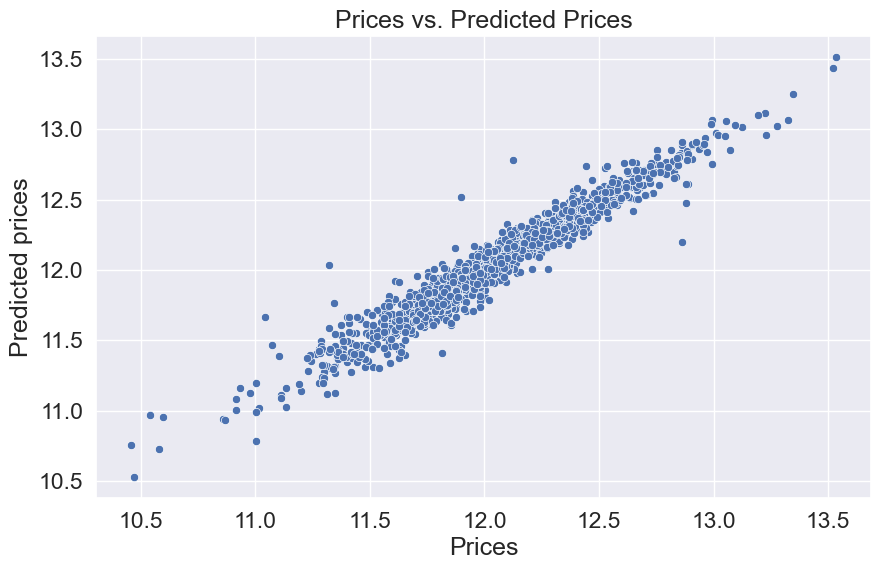

In [172]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,6))
sns.scatterplot( x= y_train, y = y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")

Text(0, 0.5, 'Residuals')

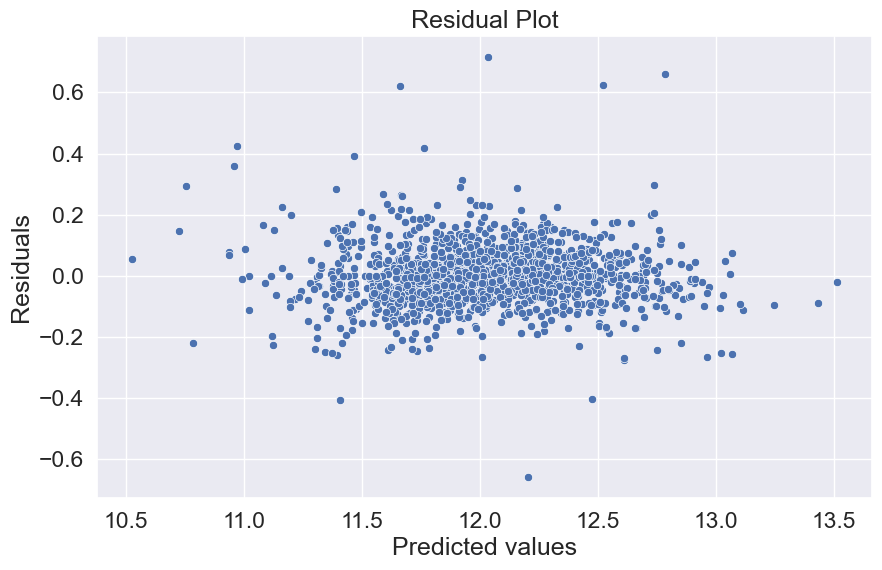

In [174]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_train_pred, y = y_train_pred - y_train)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

In [176]:
lasso_model = make_pipeline(RobustScaler(), 
                         LassoCV(alphas = [0.0004, 0.0005, 0.0006],
                                 random_state = 0,
                                 cv = 10))

lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

# print("Best alpha : {}", lasso_model.alpha_)
print("Mean Squared Error = {:.8f}".format(MSE_train))


Mean Squared Error = 0.01253743


<function matplotlib.pyplot.show(close=None, block=None)>

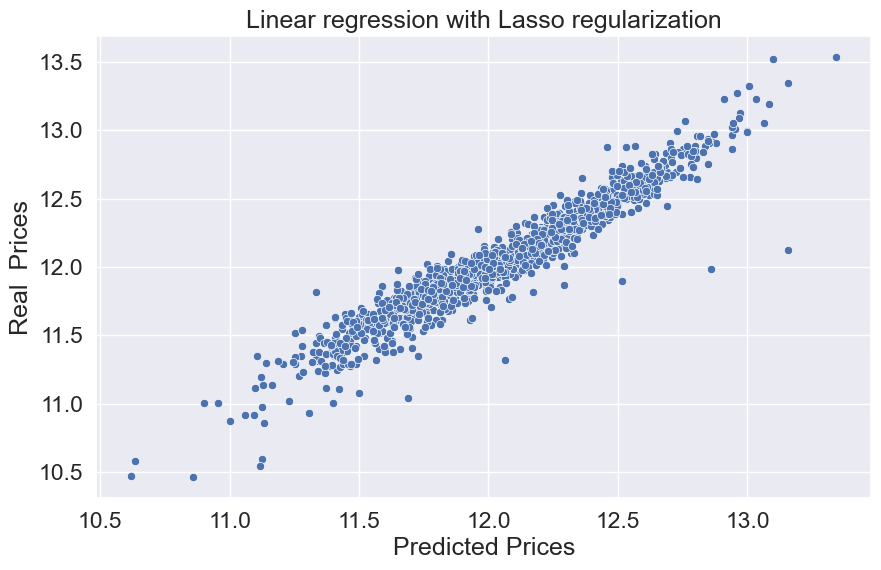

In [178]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_train_pred, y = y_train)
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted Prices")
plt.ylabel("Real  Prices")
plt.show

In [179]:
gbr = GradientBoostingRegressor(random_state=0)
param_grid = {'n_estimators': [2500],
              'max_features': [13],
              'max_depth': [5],
              'learning_rate': [0.05],
              'subsample': [0.8],
             'random_state' : [5]}
                              
gb_model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=5)
gb_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.05], 'max_depth': [5],
                         'max_features': [13], 'n_estimators': [2500],
                         'random_state': [5], 'subsample': [0.8]})

In [181]:
y_train_pred = gb_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)
print('Best Parameters: {}'.format(gb_model.best_params_))
print("Mean Squared Error = {:.8f}".format(MSE_train))


Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 13, 'n_estimators': 2500, 'random_state': 5, 'subsample': 0.8}
Mean Squared Error = 0.00000599


In [186]:
en_model = ElasticNetCV(alphas = [0.0001, 0.0003, 0.0004, 0.0006], 
                        l1_ratio = [.9, .92], 
                        random_state = 0,
                        cv=10)

In [187]:
en_model.fit(X_train, y_train)

y_train_pred = en_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

/Users/jeweilin/Documents/Python/myenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13383422898132125, tolerance: 0.021187322042519895
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jeweilin/Documents/Python/myenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.338105325120746, tolerance: 0.021187322042519895
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jeweilin/Documents/Python/myenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2510026257234328, tolerance: 0.021001871740020182
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jew

In [188]:
print("Mean Squared Error = {:.8f}".format(MSE_train))

Mean Squared Error = 0.01236010


In [191]:
# Define LightGBM Model
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=800,
    max_bin=55,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.2,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=6,
    min_sum_hessian_in_leaf=11
)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict on training set
y_train_pred = lgb_model.predict(X_train)

# Compute Mean Squared Error
MSE_train = mean_squared_error(y_train, y_train_pred)

# Define RMSE function
def rmse(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

# Print results
print("Mean Squared Error = {:.8f}".format(MSE_train))


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2


[LightGBM] [Fatal] Feature (Neighborhood) appears more than one time.


LightGBMError: Feature (Neighborhood) appears more than one time.